# Titanic Logistic Regression

Machine Learning classification model using logistic regression and Kaggle's famous Titanic Data Set.

## Import Libraries

In [165]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [166]:
%matplotlib inline

## The Data

In [167]:
# Read training data set
train = pd.read_csv('titanic_train.csv')

# View first few rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data
Create heatmap to determine if the dataset has missing data and visualize where those missing values are located.

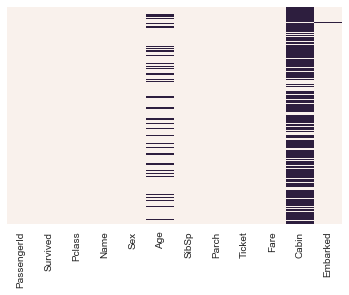

In [168]:
# Heatmap
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

Some 'Age' information is missing (roughly 20%), but this proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values).

However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0'

## Target Variable
It is always a good idea to see the ratio of the actual target labels in the training data (what we're trying to predict).

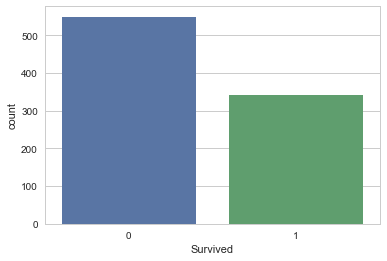

In [169]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = train)

As show above, there are more non-survivors than survivors.  

### Survival by Gender

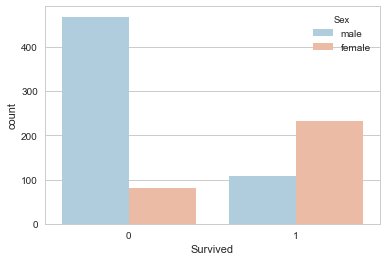

In [170]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

People that did not survive were more likely to be male and people that did survive were twice as likely to be female.

### Survival by Class

In [171]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

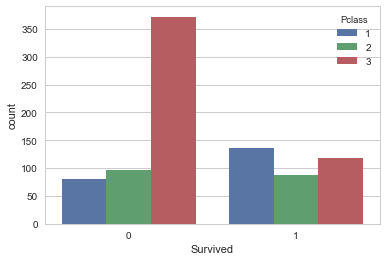

In [172]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

## Features

### Age Distribution

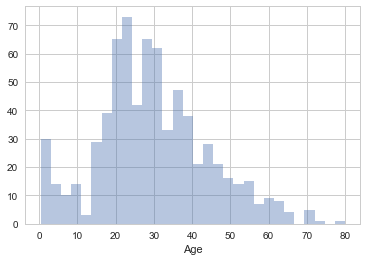

In [173]:
# Histogram using Seaborn
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

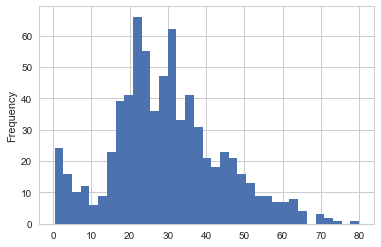

In [174]:
# Histogram using pandas
train['Age'].plot.hist(bins = 35)

There appears to be a bimodal distribution where there are a large number of children on board between ages 0 and 10 years old. Then the average age moves toward 20 or 30. Thus, the data is quite skewed toward younger passengers.

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Spouse or Children on Board

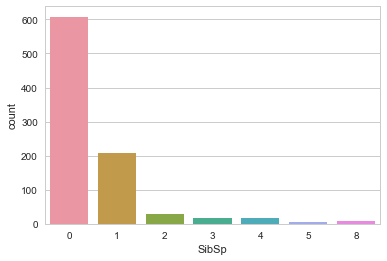

In [176]:
sns.countplot(x = 'SibSp', data = train)

The major of passengers had neither a spouse or children with them.  

**Fare**


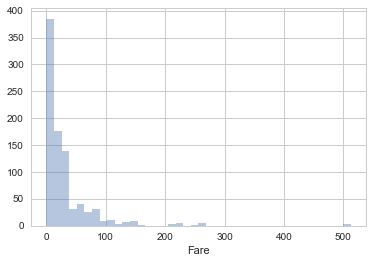

In [177]:
# Histogram using Seaborn
sns.distplot(train['Fare'], kde = False, bins = 40)
plt.figure(figsize = (10,4))

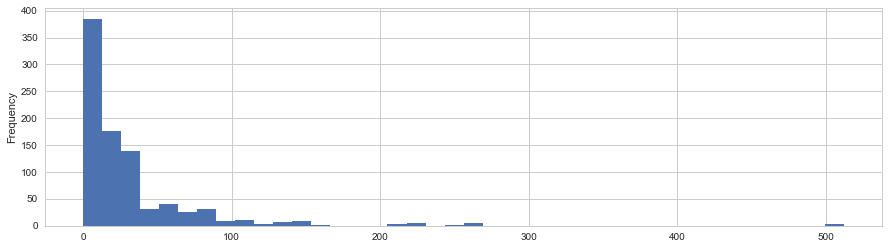

In [178]:
# Histogram with Panda
train['Fare'].plot.hist(bins = 40, figsize = (15,4))

Fare is distributed toward the cheaper fare tickets, with most purchase prices being between 0 and 50

### Cufflinks for Plots
import cufflinks as cf  
cf.go_offline()  
train['Fare'].iplot(kind = 'hist', bins = 50)  

# Data Cleaning

## Missing Data
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).

However, we can be smarter about this and check the average age by passenger class. For example:

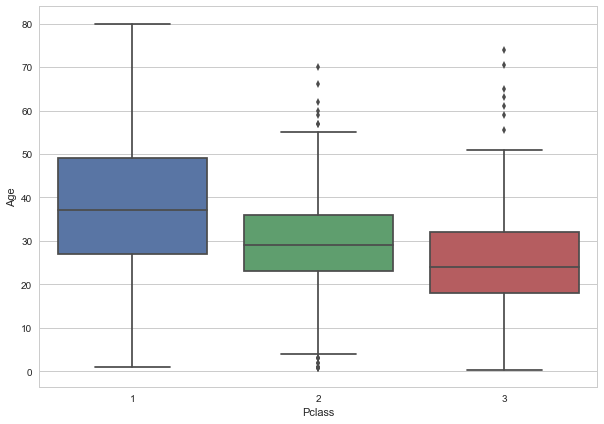

In [179]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [180]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [181]:
# Apply the function to the Age column
train['Age']=train[['Age','Pclass']].apply(impute_age, axis =1 )

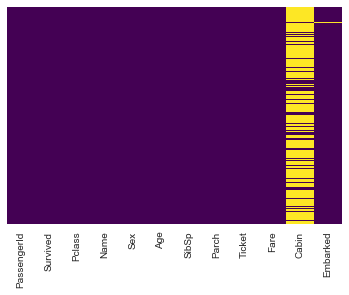

In [182]:
# Check if missing age values are filled in
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether. 

In [183]:
# Remove Cabin
train.drop('Cabin', axis = 1, inplace = True)

In [184]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


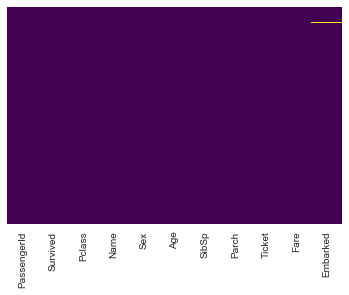

In [185]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

Since there is only one missing value in Embarked, that can just be dropped also.  

In [186]:
train.dropna(inplace = True)

Now check the data to confirm all missing values have been addressed.

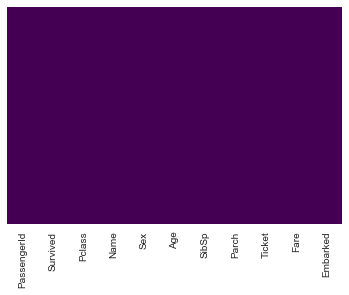

In [187]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

## Categorical Features
Categorial features will need to be converted into 'dummy variables' otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [189]:
# Convert categorical variables into "dummy" or indicator variables 
sex = pd.get_dummies(train['Sex'], drop_first = True) # drop_first prevents multi-collinearity
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [190]:
# Convert Embark column into dummy variable
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [191]:
# Add new dummy columns to data frame
train = pd.concat([train,sex,embark],axis = 1)

In [192]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [193]:
# Drop unnecessary columns
train.drop(['Sex', 'Embarked','Name','Ticket'], axis = 1, inplace = True)

In [194]:
# Drop PassengerId column
train.drop('PassengerId', axis = 1, inplace = True)

In [195]:
# Confirm changes
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now the data is perfect for a machine learning algorithm:
- all the data is numeric
- everything is concatenated together
- columns working perfectly

# Building a Logistic Regression Model


## Train Test Split

In [199]:
# Separate data into x and y variables
x = train.drop('Survived',axis = 1) #x is everything else
y = train['Survived'] #y is the column we're trying to predict

In [221]:
# Use x and y variables to split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 101)

## Build Model

In [207]:
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
logmodel = LogisticRegression()

## Train Model on Training Data

In [211]:
# Pass the training data into model
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions on Test Data

In [213]:
# Make predictions on test data
predictions = logmodel.predict(x_test)

## Model Evaluation

### Classification Report

In [216]:
# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



### Confusion Matrix

In [222]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

# Improve Performance
To improve the model's performance, the following feature engineering options can be explored: 
- Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature  
- Maybe the Cabin letter could be a feature  
- Is there any info you can get from the ticket?  